* Output variable -> y
* y -> Whether the client has subscribed a term deposit or not 
* Binomial ("yes" or "no")


* Attribute information For bank dataset

*   Input variables:
*   > bank client data:
*   1 - age (numeric)
*   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
*                                       "blue-collar","self-employed","retired","technician","services") 
*   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
*   4 - education (categorical: "unknown","secondary","primary","tertiary")
*   5 - default: has credit in default? (binary: "yes","no")
*   6 - balance: average yearly balance, in euros (numeric) 
*   7 - housing: has housing loan? (binary: "yes","no")
*   8 - loan: has personal loan? (binary: "yes","no")
*   > related with the last contact of the current campaign:
*   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
*  10 - day: last contact day of the month (numeric)
*  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
*  12 - duration: last contact duration, in seconds (numeric)
*   > other attributes:
*  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
*  15 - previous: number of contacts performed before this campaign and for this client (numeric)
*  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

*  Output variable (desired target):
*  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

* 8. Missing Attribute Values: None



In [30]:
# UPLOADED DATA
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
df=pd.read_csv('bank-full.csv',sep=';')  
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<AxesSubplot:>

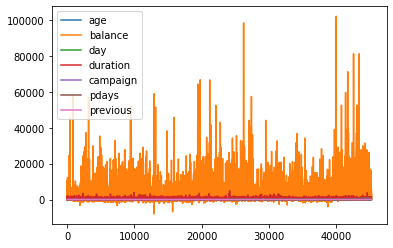

In [33]:
#  DATA VISUALIZATION 

df.plot()

<AxesSubplot:ylabel='Frequency'>

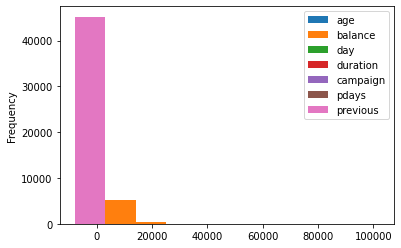

In [35]:
df.plot(kind='hist')

<AxesSubplot:>

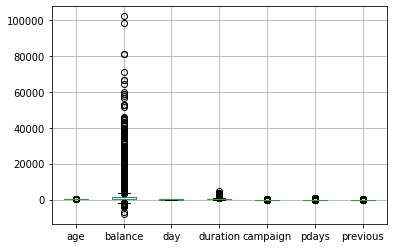

In [34]:
# BOXPLOT 
df.boxplot()

In [3]:
# BY DATA INFORMATION, WE CAN UNDERSTAND  NO EMPTY VALUE  IN THIS DATA 

df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# THIS GIVE DATA SHAPE ,  NUMBR OF ROWS AND COLUMNS 
df.shape

(45211, 17)

In [5]:
# SEPRATED SOME COLMUNS FROM MAIN DATA FOR CONVERTED INTO THE BINARY  FORM 
string_column=pd.DataFrame({'job':df['job'],'marital':df['marital'],'education':df['education'],'default':df['default'],
            'housing':df['housing'],'loan':df['loan'],'contact':df['contact'],'month':df['month'],'poutcome':df['poutcome']})
string_column   

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [6]:
# HERE I HAVE USED OneHotcoding AND CONVERTING DATA IN DUMMPY VARIABLE
df1=pd.get_dummies(string_column)
df1                      

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
45207,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [7]:
 # HERE I HAVE TAKEN ALL INDEPDENT VARIABLE DATA IN df1
df1['balance']=df['balance']
df1['day']=df['day']
df1['duration']=df['duration']
df1['campaign']=df['campaign']
df1['pdays']=df['pdays']
df1['previous']=df['previous']

df1                               

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,29,5,151,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,2,5,76,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,825,17,977,3,-1,0
45207,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1729,17,456,2,-1,0
45208,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,5715,17,1127,5,184,3
45209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,668,17,508,4,-1,0


In [8]:
# here I have TAKEN dependent variable in x variable and independent variable in y variable 

y=df['y']  
x=df1


In [9]:
x

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,29,5,151,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,2,5,76,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,825,17,977,3,-1,0
45207,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1729,17,456,2,-1,0
45208,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,5715,17,1127,5,184,3
45209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,668,17,508,4,-1,0


In [10]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [11]:
# here i have splited data for training and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25)   

In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [13]:
model.fit(x_train,y_train)

c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [14]:
model.score(x_test,y_test)     # I have got here accuracy 

0.8948066884897815

In [15]:
# COEFFICIENT VALUES 
model.coef_

array([[-4.51000720e-02, -3.25340323e-01, -5.28263007e-02,
        -3.28575261e-02, -5.26584791e-02,  7.17625038e-02,
        -2.01954792e-02, -1.13641741e-01,  5.87720780e-02,
        -1.06077525e-01, -9.17056270e-03, -3.42930036e-03,
        -1.03814505e-01, -4.76823516e-01, -5.01247064e-02,
        -2.18118775e-01, -3.96706255e-01, -5.71570251e-03,
        -1.02219946e-02, -5.89724684e-01, -4.10380431e-02,
         1.76416423e-01, -8.07179150e-01, -3.01087226e-01,
        -3.29675501e-01, -2.07583720e-02, -2.93416432e-03,
        -6.07070191e-01,  4.08388385e-02, -2.01050007e-02,
         2.94039942e-02, -8.66472319e-02, -2.15863960e-02,
        -1.30898647e-01, -1.42325332e-01,  1.00108540e-01,
        -4.87130746e-01, -9.27814513e-02,  1.09976459e-01,
         7.03842458e-02, -1.83726573e-01, -3.52527374e-02,
         3.55440748e-01, -7.67224164e-01,  2.14389581e-05,
        -9.34813311e-04,  4.20884773e-03, -1.11454492e-01,
         1.32185165e-03, -1.17894932e-03]])

In [16]:
# INTERCEPT VALUE 
model.intercept_

array([-0.63097176])

In [17]:
# PRECTION VALUES BY MODEL 
y_pred = model.predict(x)
y_pred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [21]:
# PROBABILITY OF PREDICTION BY MODEL
model.predict_proba(x)


array([[0.97583959, 0.02416041],
       [0.98557964, 0.01442036],
       [0.99291642, 0.00708358],
       ...,
       [0.06740945, 0.93259055],
       [0.84784433, 0.15215567],
       [0.69861006, 0.30138994]])

In [22]:
# ZERO COLUMN PREDICTION PROBABILITY OF ABOVE ARRAY 
model.predict_proba(x)[:,0]


array([0.97583959, 0.98557964, 0.99291642, ..., 0.06740945, 0.84784433,
       0.69861006])

In [23]:
# # ONE COLUMNS PRECITION PROBABILITY ABOVE ARRAY
model.predict_proba(x)[:,1]


array([0.02416041, 0.01442036, 0.00708358, ..., 0.93259055, 0.15215567,
       0.30138994])

In [26]:

comparision = pd.DataFrame({'actual': y,
                          'prob(0)': model.predict_proba(x)[:, 0],
                         'prob(1)': model.predict_proba(x)[:, 1],
                         'predicted': y_pred}) 
comparision

,actual,prob(0),prob(1),predicted
0,no,0.975840,0.024160,no
1,no,0.985580,0.014420,no
2,no,0.992916,0.007084,no
3,no,0.990993,0.009007,no
4,no,0.927885,0.072115,no
...,...,...,...,...
45206,yes,0.276197,0.723803,yes
45207,yes,0.681380,0.318620,no
45208,yes,0.067409,0.932591,yes
45209,no,0.847844,0.152156,no


In [31]:
# CONFUSION MATRIX 

# Confusion Matrix for the model accuracy
conf_matrix = confusion_matrix(y, y_pred)

print(conf_matrix)

[[39117   805]
 [ 4007  1282]]


<AxesSubplot:>

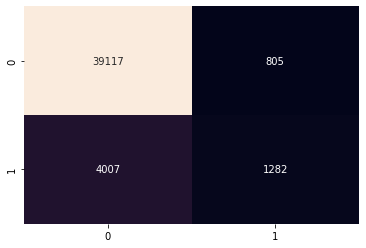

In [32]:
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False)

In [38]:
# ACCURACY OF MODEL
Accuracy = ((39117+1282)/(39117+805+4007+1282))*100 , # correct prediction=39117+1282, wrong prediction=4007+805  
Accuracy

89.35657251553826